In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
data = pd.read_csv('/content/sample_data/tripv2pub.csv')
data.head()

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,...,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
0,9000013002,1,1,1,900001300201,1,2,1,1,1,...,2,1,1,2,1,7,3,2,3,11
1,9000013002,1,2,2,900001300201,1,2,1,1,1,...,2,1,1,2,1,7,3,2,3,11
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11


In [174]:
data.shape


(31074, 85)

In [175]:
# autocorrelation_plot(data)
# pyplot.show()

In [197]:
df = data[['URBRUR','URBANSIZE','TRAVDAY','TDAYDATE','STRTTIME','ENDTIME','TRPMILES','VEHID']]
df.head()


,URBRUR,URBANSIZE,TRAVDAY,TDAYDATE,STRTTIME,ENDTIME,TRPMILES,VEHID
STRTDATETIME,,,,,,,,
2022-02 14:35,1,4,1,2022-02,14:35,14:50,3.902424,1
2022-02 16:05,1,4,1,2022-02,16:05,16:15,3.902424,1
2022-02 07:00,1,4,1,2022-02,07:00,07:30,17.077067,2
2022-02 07:40,1,4,1,2022-02,07:40,07:50,4.748291,2
2022-02 08:00,1,4,1,2022-02,08:00,08:30,14.098819,2


In [177]:
df.shape

(31074, 8)

In [178]:
df2 = pd.read_csv('/content/sample_data/perv2pub.csv')
df2 = df2[['WRKTRANS']]
df2.head()

,WRKTRANS
0,-1
1,-1
2,-1
3,-1
4,1


In [179]:
data = pd.concat([df,df2],axis=1)
data.head()
print(data.dtypes)

URBRUR         int64
URBANSIZE      int64
TRAVDAY        int64
TDAYDATE       int64
STRTTIME       int64
ENDTIME        int64
TRPMILES     float64
VEHID          int64
WRKTRANS     float64
dtype: object


In [134]:
# for column in data.columns:
#   unique_values = data[column].unique()
#   print(f"Column '{column}': {unique_values}")

# **Data Preprocessing**

**Handling Missing Values**

In [180]:
print('Shape before handling missing values',data.shape)
data['WRKTRANS'] = data['WRKTRANS'].replace(-1.0, pd.NA)
print(data.head())

# Fill missing values in 'WRKTRANS' with the mode (most frequent value)
wrkt_mode = data['WRKTRANS'].mode()[0]
data['WRKTRANS'].fillna(wrkt_mode, inplace=True)

# Display the data after imputing missing values
print(data.head())

print('Shape after handling missing values',data.shape)

Shape before handling missing values (31074, 9)
   URBRUR  URBANSIZE  TRAVDAY  TDAYDATE  STRTTIME  ENDTIME   TRPMILES  VEHID  \
0       1          4        1    202202      1435     1450   3.902424      1   
1       1          4        1    202202      1605     1615   3.902424      1   
2       1          4        1    202202       700      730  17.077067      2   
3       1          4        1    202202       740      750   4.748291      2   
4       1          4        1    202202       800      830  14.098819      2   

  WRKTRANS  
0     <NA>  
1     <NA>  
2     <NA>  
3     <NA>  
4      1.0  
   URBRUR  URBANSIZE  TRAVDAY  TDAYDATE  STRTTIME  ENDTIME   TRPMILES  VEHID  \
0       1          4        1    202202      1435     1450   3.902424      1   
1       1          4        1    202202      1605     1615   3.902424      1   
2       1          4        1    202202       700      730  17.077067      2   
3       1          4        1    202202       740      750   4.748291    

In [181]:
print('Shape before handling missing values',data.shape)
data = data.dropna()
print('Shape after handling missing values',data.shape)

Shape before handling missing values (31074, 9)
Shape after handling missing values (31074, 9)


In [182]:
data['STRTDATETIME_UNIX'] = data['TDAYDATE'] + data['STRTTIME']
data['ENDDATETIME_UNIX'] = data['TDAYDATE'] + data['ENDTIME']
print(data.dtypes)

URBRUR                 int64
URBANSIZE              int64
TRAVDAY                int64
TDAYDATE               int64
STRTTIME               int64
ENDTIME                int64
TRPMILES             float64
VEHID                  int64
WRKTRANS             float64
STRTDATETIME_UNIX      int64
ENDDATETIME_UNIX       int64
dtype: object


In [183]:
# Convert TDAYDATE to datetime format representing YearMonth and then to YYYY-MM
data['TDAYDATE'] = pd.to_datetime(data['TDAYDATE'].astype(str), format='%Y%m').dt.strftime('%Y-%m')

# Display the data to check the conversion
print(data.head())

   URBRUR  URBANSIZE  TRAVDAY TDAYDATE  STRTTIME  ENDTIME   TRPMILES  VEHID  \
0       1          4        1  2022-02      1435     1450   3.902424      1   
1       1          4        1  2022-02      1605     1615   3.902424      1   
2       1          4        1  2022-02       700      730  17.077067      2   
3       1          4        1  2022-02       740      750   4.748291      2   
4       1          4        1  2022-02       800      830  14.098819      2   

   WRKTRANS  STRTDATETIME_UNIX  ENDDATETIME_UNIX  
0       1.0             203637            203652  
1       1.0             203807            203817  
2       1.0             202902            202932  
3       1.0             202942            202952  
4       1.0             203002            203032  


In [184]:
def convert_to_time_format(time_int):
    time_str = str(time_int).zfill(4)  # Convert to string and pad with zeros
    return time_str[:2] + ':' + time_str[2:]  # Insert colon between hours and minutes

# Apply the conversion function to STRTTIME and ENDTIME columns
data['STRTTIME'] = data['STRTTIME'].apply(convert_to_time_format)
data['ENDTIME'] = data['ENDTIME'].apply(convert_to_time_format)
print(data.head())


   URBRUR  URBANSIZE  TRAVDAY TDAYDATE STRTTIME ENDTIME   TRPMILES  VEHID  \
0       1          4        1  2022-02    14:35   14:50   3.902424      1   
1       1          4        1  2022-02    16:05   16:15   3.902424      1   
2       1          4        1  2022-02    07:00   07:30  17.077067      2   
3       1          4        1  2022-02    07:40   07:50   4.748291      2   
4       1          4        1  2022-02    08:00   08:30  14.098819      2   

   WRKTRANS  STRTDATETIME_UNIX  ENDDATETIME_UNIX  
0       1.0             203637            203652  
1       1.0             203807            203817  
2       1.0             202902            202932  
3       1.0             202942            202952  
4       1.0             203002            203032  


In [185]:
data['STRTDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['STRTTIME'])
data['ENDDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['ENDTIME'])
data['STRTDATETIME'] = data['STRTDATETIME'].dt.strftime('%Y-%m %H:%M')
data['ENDDATETIME'] = data['ENDDATETIME'].dt.strftime('%Y-%m %H:%M')
print(data.head())

<ipython-input-185-a84076d6baf0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['STRTDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['STRTTIME'])
<ipython-input-185-a84076d6baf0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ENDDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['ENDTIME'])


   URBRUR  URBANSIZE  TRAVDAY TDAYDATE STRTTIME ENDTIME   TRPMILES  VEHID  \
0       1          4        1  2022-02    14:35   14:50   3.902424      1   
1       1          4        1  2022-02    16:05   16:15   3.902424      1   
2       1          4        1  2022-02    07:00   07:30  17.077067      2   
3       1          4        1  2022-02    07:40   07:50   4.748291      2   
4       1          4        1  2022-02    08:00   08:30  14.098819      2   

   WRKTRANS  STRTDATETIME_UNIX  ENDDATETIME_UNIX   STRTDATETIME    ENDDATETIME  
0       1.0             203637            203652  2022-02 14:35  2022-02 14:50  
1       1.0             203807            203817  2022-02 16:05  2022-02 16:15  
2       1.0             202902            202932  2022-02 07:00  2022-02 07:30  
3       1.0             202942            202952  2022-02 07:40  2022-02 07:50  
4       1.0             203002            203032  2022-02 08:00  2022-02 08:30  


In [186]:
data.set_index(data['STRTDATETIME'], inplace=True)
data.head()

,URBRUR,URBANSIZE,TRAVDAY,TDAYDATE,STRTTIME,ENDTIME,TRPMILES,VEHID,WRKTRANS,STRTDATETIME_UNIX,ENDDATETIME_UNIX,STRTDATETIME,ENDDATETIME
STRTDATETIME,,,,,,,,,,,,,
2022-02 14:35,1,4,1,2022-02,14:35,14:50,3.902424,1,1.0,203637,203652,2022-02 14:35,2022-02 14:50
2022-02 16:05,1,4,1,2022-02,16:05,16:15,3.902424,1,1.0,203807,203817,2022-02 16:05,2022-02 16:15
2022-02 07:00,1,4,1,2022-02,07:00,07:30,17.077067,2,1.0,202902,202932,2022-02 07:00,2022-02 07:30
2022-02 07:40,1,4,1,2022-02,07:40,07:50,4.748291,2,1.0,202942,202952,2022-02 07:40,2022-02 07:50
2022-02 08:00,1,4,1,2022-02,08:00,08:30,14.098819,2,1.0,203002,203032,2022-02 08:00,2022-02 08:30


# **Exploratory Data Analysis(EDA)**

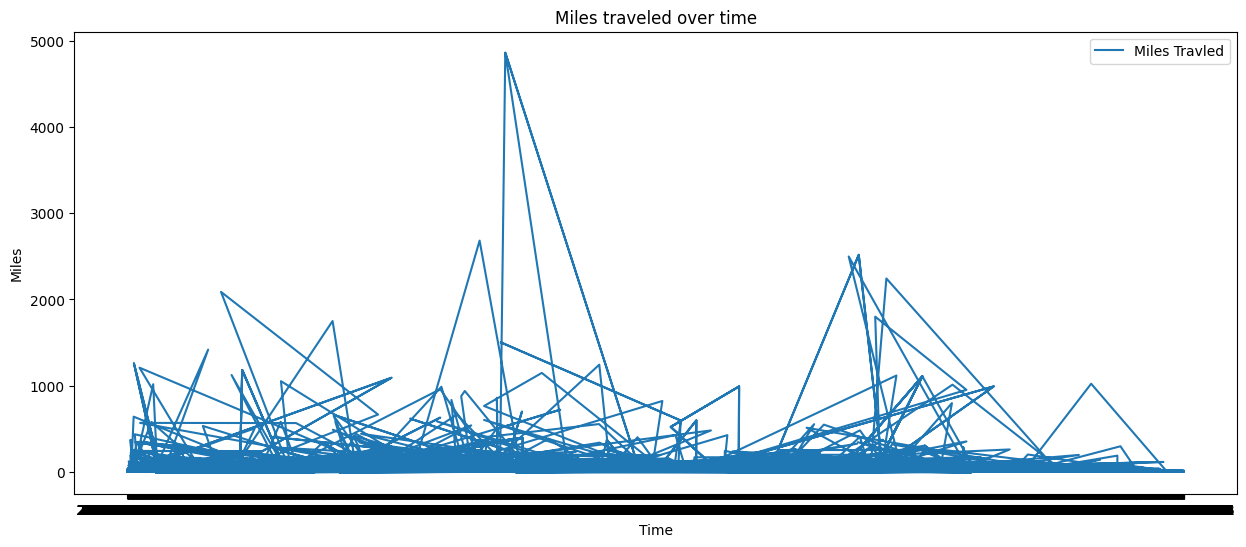

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data.index,data['TRPMILES'],label='Miles Travled')
plt.title('Miles traveled over time')
plt.xlabel('Time')
plt.ylabel('Miles')
plt.legend()
plt.show()

# **Data Preprocessing part 2**

In [187]:
start_time_series = data['STRTDATETIME']
end_time_series = data['ENDDATETIME']
trpmiles_series = data['TRPMILES']
start_time_series.head()

STRTDATETIME
2022-02 14:35    2022-02 14:35
2022-02 16:05    2022-02 16:05
2022-02 07:00    2022-02 07:00
2022-02 07:40    2022-02 07:40
2022-02 08:00    2022-02 08:00
Name: STRTDATETIME, dtype: object

In [188]:
data.dtypes

URBRUR                 int64
URBANSIZE              int64
TRAVDAY                int64
TDAYDATE              object
STRTTIME              object
ENDTIME               object
TRPMILES             float64
VEHID                  int64
WRKTRANS             float64
STRTDATETIME_UNIX      int64
ENDDATETIME_UNIX       int64
STRTDATETIME          object
ENDDATETIME           object
dtype: object

ADF Statistic: -40.339711655184125
p-value: 0.0
Critical Values:
	1%: -3.430560561851238
	5%: -2.8616330627632154
	10%: -2.566819534448655


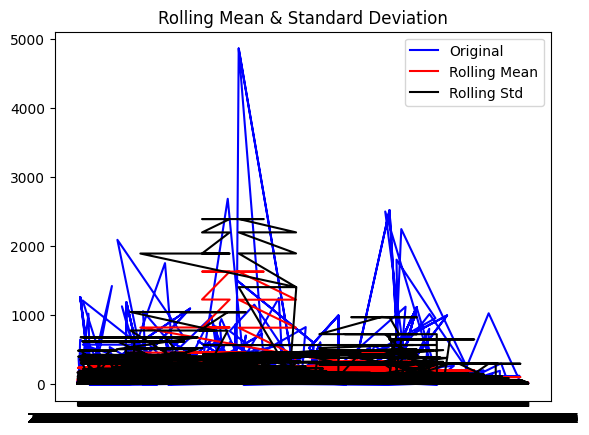

In [189]:
def check_stationarity(ts):
    # Example ADF test
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Plotting rolling statistics
    rolling_mean = ts.rolling(window=12).mean()
    rolling_std = ts.rolling(window=12).std()

    plt.plot(ts, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# Example: Check stationarity for TRPMILES
check_stationarity(data['TRPMILES'])

ADF Statistic: -40.339711655184125
p-value: 0.0
Critical Values:
	1%: -3.430560561851238
	5%: -2.8616330627632154
	10%: -2.566819534448655


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c4cede34820> (for post_execute):


KeyboardInterrupt: 

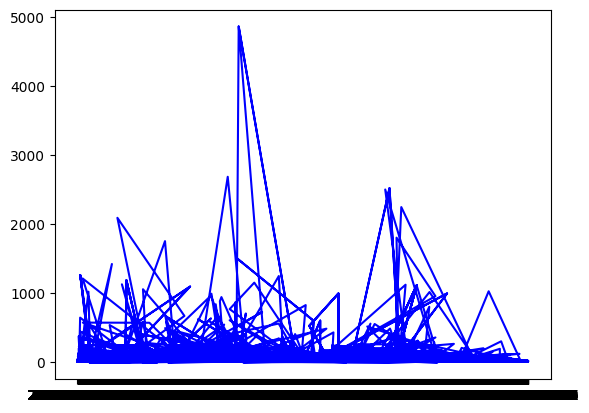

In [190]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming data is already loaded and formatted correctly

# Check stationarity and apply transformation if needed
def check_stationarity(ts):
    # Example ADF test
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Plotting rolling statistics
    rolling_mean = ts.rolling(window=12).mean()
    rolling_std = ts.rolling(window=12).std()

    plt.plot(ts, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# Example: Check stationarity for TRPMILES
check_stationarity(data['TRPMILES'])

# Fit ARIMA models
model_st = ARIMA(data['STRTDATETIME'], order=(p, d, q)).fit()
model_et = ARIMA(data['ENDDATETIME'], order=(p, d, q)).fit()
model_trp = ARIMA(data['TRPMILES'], order=(p, d, q)).fit()

# Forecast future values
forecast_st = model_st.forecast(steps=12)  # Example: forecasting 12 steps ahead
forecast_et = model_et.forecast(steps=12)
forecast_trp = model_trp.forecast(steps=12)

# Print forecasts
print("Forecasted STRTIME:")
print(forecast_st)
print("Forecasted ENDTIME:")
print(forecast_et)
print("Forecasted TRPMILES:")
print(forecast_trp)


# **Model Building**

In [191]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model (p, d, q)
p = 1
d = 0
q = 1

# Fit ARIMA model (example: TRPMILES time series)
model = ARIMA(data['TRPMILES'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-ex

                               SARIMAX Results                                
Dep. Variable:               TRPMILES   No. Observations:                31074
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -181249.236
Date:                Thu, 20 Jun 2024   AIC                         362506.473
Time:                        19:55:15   BIC                         362539.849
Sample:                             0   HQIC                        362517.164
                              - 31074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9648      1.606      8.695      0.000      10.817      17.113
ar.L1          0.8572      0.001    973.420      0.000       0.856       0.859
ma.L1         -0.7214      0.001   -545.590      0.0

In [192]:
from statsmodels.tsa.arima.model import ARIMA

# Convert datetime objects to numerical timestamps
data['STRTDATETIME'] = pd.to_numeric(pd.to_datetime(data['STRTDATETIME']))

# Define the order of the ARIMA model (p, d, q)
model_s = ARIMA(data['STRTDATETIME'], order=(1,1,1))
models_s_fit = model_s.fit()

# Summary of the model
print(models_s_fit.summary())

<ipython-input-192-102b19183080>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['STRTDATETIME'] = pd.to_numeric(pd.to_datetime(data['STRTDATETIME']))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will

                               SARIMAX Results                                
Dep. Variable:           STRTDATETIME   No. Observations:                31074
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1120224.240
Date:                Thu, 20 Jun 2024   AIC                        2240454.479
Time:                        19:55:30   BIC                        2240479.512
Sample:                             0   HQIC                       2240462.498
                              - 31074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4241      0.497      0.854      0.393      -0.550       1.398
ma.L1         -0.4254      0.497     -0.856      0.392      -1.399       0.548
sigma2      1.201e+30   6.11e-31   1.97e+60      0.0

In [193]:
from statsmodels.tsa.arima.model import ARIMA

# Convert datetime objects to numerical timestamps
data['ENDDATETIME'] = pd.to_numeric(pd.to_datetime(data['ENDDATETIME']))

# Define the order of the ARIMA model (p, d, q)
model_s = ARIMA(data['ENDDATETIME'], order=(1,1,1))
models_s_fit = model_s.fit()

# Summary of the model
print(models_s_fit.summary())

<ipython-input-193-7ed97df710cf>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ENDDATETIME'] = pd.to_numeric(pd.to_datetime(data['ENDDATETIME']))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will b

                               SARIMAX Results                                
Dep. Variable:            ENDDATETIME   No. Observations:                31074
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1120220.999
Date:                Thu, 20 Jun 2024   AIC                        2240447.998
Time:                        19:55:53   BIC                        2240473.031
Sample:                             0   HQIC                       2240456.017
                              - 31074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8824      0.043     20.655      0.000       0.799       0.966
ma.L1         -0.8838      0.043    -20.751      0.000      -0.967      -0.800
sigma2      1.201e+30   4.11e-33   2.93e+62      0.0

# **Feature Engineering**

In [108]:
# data['plug_in'] = 1
# data['plug_out'] = 1
# events_df = data[['plug_in','plug_out', 'TRPMILES']]
# events_df.head()

,plug_in,plug_out,TRPMILES
STRTDATETIME,,,
2022-02 14:35,1,1,3.902424
2022-02 16:05,1,1,3.902424
2022-02 07:00,1,1,17.077067
2022-02 07:40,1,1,4.748291
2022-02 08:00,1,1,14.098819


# **Model Evaluation**

In [109]:
# data.dtypes

URBRUR                 int64
URBANSIZE              int64
TRAVDAY                int64
TDAYDATE              object
STRTTIME              object
ENDTIME               object
TRPMILES             float64
VEHID                  int64
WRKTRANS             float64
STRTDATETIME_UNIX      int64
ENDDATETIME_UNIX       int64
STRTDATETIME          object
ENDDATETIME           object
plug_in                int64
plug_out               int64
dtype: object

In [116]:
# # Prepare the data for
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# X = data[['STRTDATETIME_UNIX']]  # Using Unix timestamp as the feature
# y_plug_in = data[['plug_in']]
# y_plug_out = data['plug_out']

# # Split the data into training and testing sets for plug-in prediction
# X_train_in, X_test_in, y_train_in, y_test_in = train_test_split(X, y_plug_in, test_size=0.2, random_state=42)
# # Ensure consistency in shapes after splitting
# print(f"X_train_in shape: {X_train_in.shape}, y_train_in shape: {len(y_train_in)}")
# print(f"X_test_in shape: {X_test_in.shape}, y_test_in shape: {len(y_test_in)}")
# # Split the data into training and testing sets for plug-out prediction
# X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X, y_plug_out, test_size=0.2, random_state=42)

# print(y_train_in.value_counts())
# print(y_train_out.value_counts())
# print('X_train',X_train_in)
# print(y_train_in)
# # Logistic Regression for plug-in prediction
# model_plug_in = LogisticRegression()
# model_plug_in.fit(X_train_in, y_train_in)

# # Logistic Regression for plug-out prediction
# model_plug_out = LogisticRegression()
# model_plug_out.fit(X_train_out, y_train_out)

# # Predict and evaluate
# y_pred_in = model_plug_in.predict(X_test_in)
# y_pred_out = model_plug_out.predict(X_test_out)

# print(f'Plug-in Prediction Accuracy: {accuracy_score(y_test_in, y_pred_in)}')
# print(f'Plug-out Prediction Accuracy: {accuracy_score(y_test_out, y_pred_out)}')


X_train_in shape: (24859, 1), y_train_in shape: 24859
X_test_in shape: (6215, 1), y_test_in shape: 6215
plug_in
1          24859
Name: count, dtype: int64
plug_out
1    24859
Name: count, dtype: int64
X_train                STRTDATETIME_UNIX
STRTDATETIME                    
2022-02 14:30             203632
2022-08 11:00             203308
2022-11 12:00             203411
2022-08 11:30             203338
2022-11 07:30             202941
...                          ...
2022-12 15:30             203742
2022-04 07:45             202949
2022-01 15:35             203736
2022-08 08:15             203023
2022-11 15:25             203736

[24859 rows x 1 columns]
               plug_in
STRTDATETIME          
2022-02 14:30        1
2022-08 11:00        1
2022-11 12:00        1
2022-08 11:30        1
2022-11 07:30        1
...                ...
2022-12 15:30        1
2022-04 07:45        1
2022-01 15:35        1
2022-08 08:15        1
2022-11 15:25        1

[24859 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [194]:
train_size = int(len(data)*0.8)
train,test = data[:train_size],data[train_size:]
model = ARIMA(train['TRPMILES'], order=(p,d,q))
model_s = ARIMA(train['STRTDATETIME'], order=(p,d,q))
model_e = ARIMA(train['ENDDATETIME'], order=(p,d,q))

model_fit = model.fit()
model_fit_s = model_s.fit()
model_fit_e = model_e.fit()
forecast1  = model_fit.forecast(len(test))
forecast2  = model_fit_s.forecast(len(test))
forecast3  = model_fit_e.forecast(len(test))
# plt.figure(figsize=(12, 6))
# plt.plot(train.index, train['TRPMILES'], label='Training')
# plt.plot(test.index, test['TRPMILES'], label='Testing')
# plt.plot(test.index, forecast, label='Forecast')
# plt.legend()
# plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-ex

In [195]:
# Forecast future values
future_steps = 10  # For example, predict next 10 steps
forecast1 = model_fit.forecast(steps=future_steps)
forecast2 = model_fit_s.forecast(steps=future_steps)
forecast3 = model_fit_e.forecast(steps=future_steps)
# Display forecasted values
print("Forest 1:",forecast1)
print("Forest 2:",forecast2)
print("Forest 3:",forecast3)

Forest 1: 24859    11.615814
24860    12.038095
24861    12.400938
24862    12.712709
24863    12.980598
24864    13.210780
24865    13.408562
24866    13.578507
24867    13.724530
24868    13.850001
Name: predicted_mean, dtype: float64
Forest 2: 24859    1.667210e+18
24860    1.667110e+18
24861    1.667011e+18
24862    1.666913e+18
24863    1.666816e+18
24864    1.666719e+18
24865    1.666624e+18
24866    1.666529e+18
24867    1.666435e+18
24868    1.666342e+18
Name: predicted_mean, dtype: float64
Forest 3: 24859    1.667210e+18
24860    1.667110e+18
24861    1.667011e+18
24862    1.666913e+18
24863    1.666816e+18
24864    1.666720e+18
24865    1.666624e+18
24866    1.666529e+18
24867    1.666435e+18
24868    1.666342e+18
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [199]:
def convert_unix_to_datetime(timestamp):
    return pd.to_datetime(timestamp // 10**9, unit='s').strftime('%Y-%m-%d %H:%M')

# Convert forecasted timestamps for STRTTIME
forecasted_times = []
for timestamp in forecast2:
    forecasted_times.append(convert_unix_to_datetime(timestamp))

# Convert forecasted timestamps for ENDTIME
forecasted_endtimes = []
for timestamp in forecast3:
    forecasted_endtimes.append(convert_unix_to_datetime(timestamp))

# Print actual STRTDATETIME, ENDTIME, TRPMILES, and forecasted values
actual_st = data['STRTDATETIME'][-len(forecasted_times):]  # Assuming you want the last forecasted times
actual_trpmiles = data['TRPMILES'][-len(forecasted_times):]  # Assuming TRPMILES aligns with STRTDATETIME
actual_end = data['ENDDATETIME'][-len(forecasted_times):]
for actual, forecast, actual_trp, forecast_trp, actual_end, forecast_end in zip(actual_st, forecasted_times, actual_trpmiles, forecast1, actual_end, forecasted_endtimes):
    print(f"Actual STRTDATETIME: {actual}, Forecasted STRTDATETIME: {forecast}, Actual TRPMILES: {actual_trp}, Forecasted TRPMILES: {forecast_trp}, Actual ENDTIME: {actual_end}, Forecasted ENDTIME: {forecast_end}")

Actual STRTDATETIME: 1669918200000000000, Forecasted STRTDATETIME: 2022-10-31 09:46, Actual TRPMILES: 1.94965817277812, Forecasted TRPMILES: 11.615814144541115, Actual ENDTIME: 1669918500000000000, Forecasted ENDTIME: 2022-10-31 09:51
Actual STRTDATETIME: 1669919100000000000, Forecasted STRTDATETIME: 2022-10-30 06:04, Actual TRPMILES: 6.34742075823493, Forecasted TRPMILES: 12.03809490223186, Actual ENDTIME: 1669920000000000000, Forecasted ENDTIME: 2022-10-30 06:10
Actual STRTDATETIME: 1669877100000000000, Forecasted STRTDATETIME: 2022-10-29 02:37, Actual TRPMILES: 6.58545680546924, Forecasted TRPMILES: 12.400937925876194, Actual ENDTIME: 1669880700000000000, Forecasted ENDTIME: 2022-10-29 02:42
Actual STRTDATETIME: 1669905000000000000, Forecasted STRTDATETIME: 2022-10-27 23:23, Actual TRPMILES: 6.53946550652579, Forecasted TRPMILES: 12.712709318272386, Actual ENDTIME: 1669907400000000000, Forecasted ENDTIME: 2022-10-27 23:29
Actual STRTDATETIME: 1672578000000000000, Forecasted STRTDATE